# Algoritmo de Horner
 Avalia um polinômio e sua derivada para um "X" fornecido <br>
 Entrada: valor de X a calcular, grau do polinômio (n) e os coeficientes a0, a1, . . . , an<br>
 Saída: y = p(X) e z = p'(X)

In [1]:
def horner(x,n,*a):
    a = a[::-1]
    y = a[n]
    z = a[n]
    
    for j in range(n-1, 0, -1):
        y = x*y + a[j]
        z = x*z + y
    y = x*y + a[0]
    return y,z

# Método de Newton

Algoritmo iterativo para encontrar o zero de uma função<br><br>
$
x_1 = x_0 − \frac{p(x_0)}{p'(x_0)}
$
<br><br>

A avaliação do polinômio, bem como sua derivada é calculada pelo algoritmo de Horner

In [2]:
def newton(x,tabela=False):
    it = 0
    itMax = 10
    n, a = func()
    while it < itMax:
        it += 1
        n, a = func()
        p,q = horner(x,n,*a)
        x = x-(p/q)
        if tabela:
            print(f"Iter:{it:02d} | Raiz: {x:.6f} | Diferença: {(p/q):.10f}")
    return x

# Exemplo
Demonstração com o polinômio<br>
$
x^4 − 3x^3 + x^2 + x + 1
$

In [3]:
# Definindo a função para ser passada para o algoritmo de horner
def func():
    return 4, [1,-3,1,1,1] # Grau 4 e lista contendo os coefs

Plotando o gráfico para estimar o "x" inicial

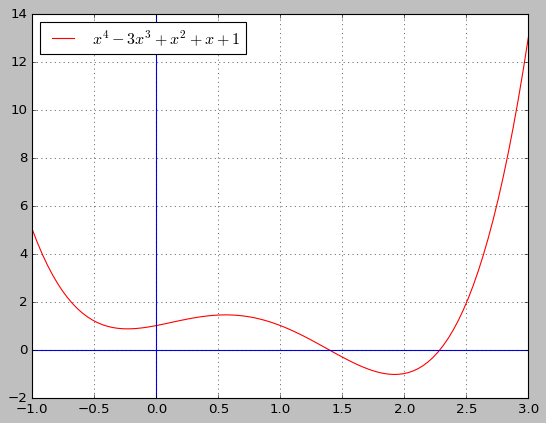

In [4]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-1, 3, num=100)
coefs = list(func()[1])[::-1]
y = np.array([np.sum(np.array([coefs[i]*(j**i) for i in range(len(coefs))])) for j in x])
plt.style.use("classic")
plt.plot(x, y, c='r', label=r'$x^4-3x^3+x^2+x+1$')
plt.grid()
plt.axvline()
plt.axhline()
plt.legend(loc="upper left")
plt.show()

A partir do gráfico, estimamos os valores inicias de "x" como 1,5 e 2,5 para encontrar as duas raízes reais

In [5]:
r1, r2 = newton(1.5), newton(2.5)
print(f"As raízes reais são {r1} e {r2}")

As raízes reais são 1.3893906833349339 e 2.2887949921884863


Tabela com as iterações do método de newton para a primeira raíz

In [6]:
newton(1.5, tabela=True)

Iter:01 | Raiz: 1.386364 | Diferença: 0.1136363636
Iter:02 | Raiz: 1.389390 | Diferença: -0.0030268473
Iter:03 | Raiz: 1.389391 | Diferença: -0.0000001996
Iter:04 | Raiz: 1.389391 | Diferença: -0.0000000000
Iter:05 | Raiz: 1.389391 | Diferença: 0.0000000000
Iter:06 | Raiz: 1.389391 | Diferença: 0.0000000000
Iter:07 | Raiz: 1.389391 | Diferença: 0.0000000000
Iter:08 | Raiz: 1.389391 | Diferença: 0.0000000000
Iter:09 | Raiz: 1.389391 | Diferença: 0.0000000000
Iter:10 | Raiz: 1.389391 | Diferença: 0.0000000000


1.3893906833349339

<br>-------------------------------------------------------------------------------------<br>
# Algoritmo de Muller

Método numérico (iterativo) para aproximar raízes complexas<br>
Entrada: f(x) e as aproximações iniciais x0, x1 e x2. <br>
Saída: raíz aproximada de f(x) ou não converge para uma raiz.

In [7]:
def muller(f,x0,x1,x2, tabela=False):
    itMax, it, tol = 30, 0, 1e-6
    x = x2
    while abs(f(x)) > tol and it < itMax:
        it = it+1
        c = f(x2)
        q0 = (f(x0) - f(x2)) / (x0-x2)
        q1 = (f(x1) - f(x2)) / (x1-x2)
        a = (q0-q1) / (x0-x1)
        b = ((q0*(x2-x1))/(x0-x1)) + ((q1*(x0-x2))/(x0-x1))
        x = x2 - ((2*c)/(b + ((b/abs(b))*(b**2 - (4*a*c))**0.5)))
        x0, x1, x2 = x1, x2, x
        
        if tabela:
            if type(tabela) == bool or it%tabela == 0 or it == 1:
                print(f"Iter:{it:02d} | Raiz: {x:.6f} | Diferença: {(x1-x2):.10f}")
        
    return x


# Exemplo
Utilizando o mesmo polinômio anterior<br>
$
x^4 − 3x^3 + x^2 + x + 1
$

In [8]:
def f(x):
    return x**4 - 3*x**3 + x**2 + x + 1

<br>
Plotando o gráfico novamente para escolher os pontos iniciais

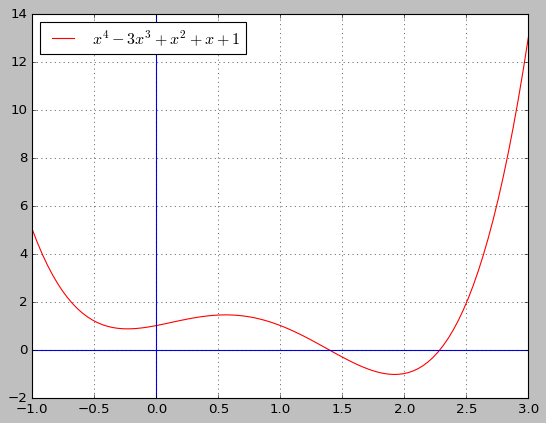

In [9]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-1, 3, num=100)
plt.style.use("classic")
plt.plot(x, f(x), c='r', label=r'$x^4-3x^3+x^2+x+1$')
plt.grid()
plt.axvline()
plt.axhline()
plt.legend(loc="upper left")
plt.show()

<br>
Aproximando as raízes reais

In [10]:
r1, r2 = muller(f, 0,1,2), muller(f, 1,2,3)
print(f"As raízes reais são {r1} e {r2}")

As raízes reais são 1.389390761933519 e 2.288794991668356


Tabela com as iterações do método de muller para a primeira raíz

In [11]:
muller(f,0,1,2, tabela=True)

Iter:01 | Raiz: 1.618034 | Diferença: 0.3819660113
Iter:02 | Raiz: 1.323071 | Diferença: 0.2949628993
Iter:03 | Raiz: 1.379694 | Diferença: -0.0566232890
Iter:04 | Raiz: 1.389532 | Diferença: -0.0098375626
Iter:05 | Raiz: 1.389391 | Diferença: 0.0001411792


1.389390761933519

<br>
Aproximando uma raiz complexa

In [12]:
r = muller(f, -0.5,0,0.5)
print(f"Uma raiz complexa é {r}")

Uma raiz complexa é (-0.33909296250720633+0.44662976694337275j)


<br>
Tabela com as iterações do método de muller para encontrar a raiz complexa

In [13]:
r = muller(f, -0.5,0,0.5, tabela=5)

Iter:01 | Raiz: -0.100000+0.888819j | Diferença: 0.6000000000-0.8888194417j
Iter:05 | Raiz: -0.356123+0.452697j | Diferença: 0.0287550047+0.0211055864j
Iter:10 | Raiz: -0.339822+0.444667j | Diferença: -0.0023013057+0.0030879874j
Iter:15 | Raiz: -0.338868+0.446546j | Diferença: -0.0003542572-0.0002623347j
Iter:20 | Raiz: -0.339083+0.446656j | Diferença: 0.0000299471-0.0000404249j
Iter:25 | Raiz: -0.339096+0.446631j | Diferença: 0.0000046095+0.0000034150j
Iter:30 | Raiz: -0.339093+0.446630j | Diferença: -0.0000003894+0.0000005256j
